# DFA: Basics, and Designing Them (Ch 4)

In [35]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.LangDef    import *  # for testing DFA actions
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from IPython.display import Image
from IPython.core.display import HTML

# The Next Three Weeks
With the foundation of languages, beginning next week, we will study three equivalent ways to realize a simple class of languages called regular languages.
## Regular Languages are those that can be exactly described by
### Deterministic Finite-State Automata (DFA, studied in Week 03)
### Nondeterministic Finite-State Automata (NFA, studied in Week 04)
### Regular Expressions (RE, studied in Week 05)

## These mechanisms are central to the whole of CS
### All compiler lexical analyzers that check the syntax of strings, numbers, etc.
### E.g., 1.234 E-07, (801) 581-8224, etc.

![introducing-dfa.png](attachment:introducing-dfa.png)

![dfa-in-the-field.png](attachment:dfa-in-the-field.png)

![formal-structure-of-a-dfa.png](attachment:formal-structure-of-a-dfa.png)

![dissecting-a-dfa-1.png](attachment:dissecting-a-dfa-1.png)

![dissecting-a-dfa-2.png](attachment:dissecting-a-dfa-2.png)

![dissecting-a-dfa-3.png](attachment:dissecting-a-dfa-3.png)

![dissecting-a-dfa-4.png](attachment:dissecting-a-dfa-4.png)

![step_dfa.png](attachment:step_dfa.png)

![run_dfa.png](attachment:run_dfa.png)

![accepts_dfa.png](attachment:accepts_dfa.png)

# What are DFA?

DFA are mechanisms to specify a simple yet powerful family of languages called
Regular Languages. Below, we define Regular Languages. Then we present how DFA
help define regular languages in two ways: One via Graphs, and the other via
Symbol and String Transition Functions.

In [36]:
i_jDivisibleByThree= md2mc('''DFA

IF : a -> S_ad  !! d denotes no more accepting either a or b
IF : b -> S_db  !! no more accepting a's (0 a % 3 = 0)

Sab : a -> Saab  !! Saba functionally the same as Saab, keep lexicographic order
Sab : b -> Sabb

Saab : a -> S_db  !! d denotes no more accepting a's
Saab : b -> Saabb

Sabb : a -> Saabb  !! Sabba functionally the same as Saabb
Sabb : b -> S_ad   !! d denotes no more accepting b's

S_db : a -> Sab   !! a % 3 was 0, now it is 1, along with 1 b (Sab)
S_db : b -> S_dbb

S_ad : a -> S_aad
S_ad : b -> Sab  !! b % 3 was 0, now it is 1, along with 1 a (Sab)

Saabb : a -> S_dbb  !! pattern continues
Saabb : b -> S_aad

S_aad : a -> IF
S_aad : b -> Saab

S_dbb : a -> Sabb
S_dbb : b -> IF

''')

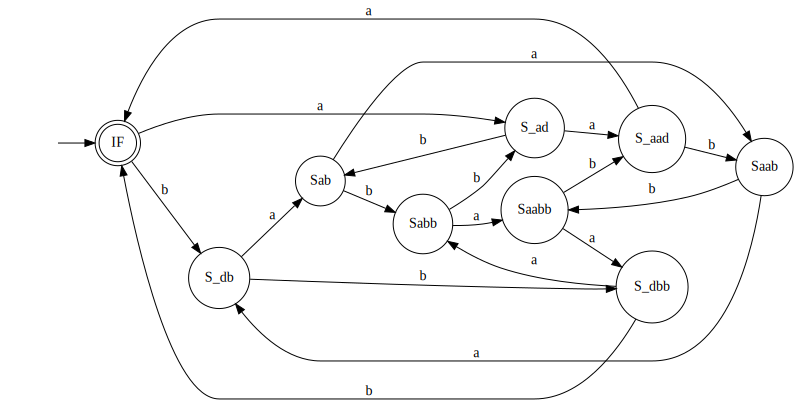

In [37]:
dotObj_dfa(i_jDivisibleByThree)

## From Languages to Regular Languages

We will now study __regular languages__. 

L is a regular language if L has a DFA. 

L is a regular language if there is a DFA D such that D accepts *all* and *only* those strings in L.

## DFA as Graphs: Define Regular Languages

DFA drawings are graphs. A string w is in a DFA D's language if there is a path from the initial state to *a* final state of D labeled by w.

## DFA as Symbol and String Transition Functions

A DFA is a quintuple $(Q, \Sigma, \delta, q_0, F)$. Its Python encoding looks as below.

In [38]:
Fig34 = {
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'q0': 'I',
 'F': {'F'}
}

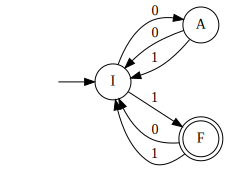

In [39]:
dotObj_dfa(Fig34)

## A prettier diagram is obtained by fusing edges

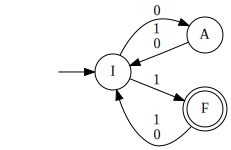

In [40]:
dotObj_dfa(Fig34, FuseEdges=True)

# The same DFA in automd (Jove's markdown)

Study the contents of the 01_1_Overview_Of_Course.ipynb notebook to learn how to define a DFA via a markdown.
You can study the animation panel which also explains the markdown syntax fully.


In [41]:
from jove.JoveEditor import *
JoveEditor(examples=True)
display(HTML('<link rel=\"stylesheet\" href=\"//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css\"/>'))

In [42]:
Fig34md = '''  !! Comments begin with !! and last till the end of line
DFA            !! This keyword tells "md2mc" that it is parsing a DFA
I : 0     -> A !! DFA transition: From initial state I, upon 0, go to state A
A : 0 | 1 -> I !! Two DFA transitions: from A, upon 0 or a 1, go to state I
I : 1     -> F !! A DFA transition from I to F. I is the initial state and F is final 
F : 0 | 1 -> I !! From F upon 0 or a 1, go to I.
'''

In [43]:
DFA1 = md2mc('''DFA

I : 0   -> A
A : 0|1 -> I
I : 1   -> F
F : 0|1 -> I

''')

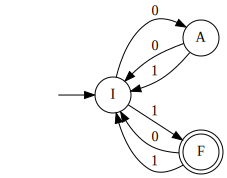

In [44]:
dotObj_dfa(DFA1)

In [45]:
step_dfa(DFA1, 'I', '0')

'A'

In [46]:
run_dfa(DFA1, '01100101')

'I'

In [47]:
run_dfa(DFA1, '011001011')

'F'

# Function md2mc is your automd compiler

In [48]:
Fig34MC = md2mc(Fig34md)
Fig34MC

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

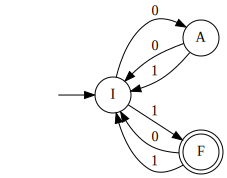

In [49]:
# md2mc alone produces a dict similar to Fig34, above.
# We pass it to dotObj_dfa which prints the DFA image,
# as shown below.

dotObj_dfa(md2mc(Fig34md))

In [50]:
accepts_dfa(md2mc(Fig34md), "10101")

True

# Testing acceptance in one "go"

Generating multiple strings according to the numeric order (increasing
lengths, with each length category exhausted before going to the next 
length category) is a handy test-input generator.

Plus, the "numeric order" is a powerful concept which we shall use 
when we later discuss the "dovetail enumeration" order (in Chapter 14
and beyond).


In [51]:
from math import floor, log, pow
def nthnumeric(N, S=['a','b']):
    """Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
       Produce the Nth string in numeric order, where N >= 0.
       Idea : Given N, get b = floor(log_2(N+1)) - need that 
       many places; what to fill in the places is the binary 
       code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].    
    """
    assert(type(S)==list # This makes sure that the order does not flip
          ),"nthnumeric now expects to be given a two-element list!!" 
    assert(len(S)==2
          ),"Expected to be given an S of length 2."
    if(N==0):
        return ''
    else:
        width = floor(log(N+1, 2))
        tofill = int(N - pow(2, width) + 1)
        relevant_binstr = bin(tofill)[2::] # strip the 0b 
                                           # in the leading string
        len_to_makeup = width - len(relevant_binstr)
        return (S[0]*len_to_makeup + 
                shomo(relevant_binstr,
                      lambda x: S[1] if x=='1' else S[0]))

In [52]:
[ nthnumeric(i) for i in range(20) ]

['',
 'a',
 'b',
 'aa',
 'ab',
 'ba',
 'bb',
 'aaa',
 'aab',
 'aba',
 'abb',
 'baa',
 'bab',
 'bba',
 'bbb',
 'aaaa',
 'aaab',
 'aaba',
 'aabb',
 'abaa']

# Now one can write a test loop

We plow thru the first 20 numeric-order listed strings,
and test for acceptance.


In [119]:
for s in [ nthnumeric(i, ['0', '1']) for i in range(20) ]:
    if accepts_dfa(md2mc(Fig34md), s):
        print("Fig34md DFA accepts ", s)
    else:
        print("Fig34md DFA does not accept ", s)

Fig34md DFA does not accept  
Fig34md DFA does not accept  0
Fig34md DFA accepts  1
Fig34md DFA does not accept  00
Fig34md DFA does not accept  01
Fig34md DFA does not accept  10
Fig34md DFA does not accept  11
Fig34md DFA does not accept  000
Fig34md DFA accepts  001
Fig34md DFA does not accept  010
Fig34md DFA accepts  011
Fig34md DFA does not accept  100
Fig34md DFA accepts  101
Fig34md DFA does not accept  110
Fig34md DFA accepts  111
Fig34md DFA does not accept  0000
Fig34md DFA does not accept  0001
Fig34md DFA does not accept  0010
Fig34md DFA does not accept  0011
Fig34md DFA does not accept  0100


# Now, simply run the cells, use help

Run the cell contents. At any time if you have a doubt about
some function, say "foo", run the "help(foo)" command. Also
refer to Appendix B of the book for a complete explanation of
all the Jove functions.


In [54]:
Fig34MC = md2mc(Fig34md)
Fig34MC

{'Delta': {('A', '0'): 'I',
  ('A', '1'): 'I',
  ('F', '0'): 'I',
  ('F', '1'): 'I',
  ('I', '0'): 'A',
  ('I', '1'): 'F'},
 'F': {'F'},
 'Q': {'A', 'F', 'I'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

In [55]:
is_partially_consistent_dfa(Fig34MC)
help(is_partially_consistent_dfa)

Help on function is_partially_consistent_dfa in module jove.DotBashers:

is_partially_consistent_dfa(D)
    In : DFA D
    Out: Boolean (are D's traits are partially consistent?)



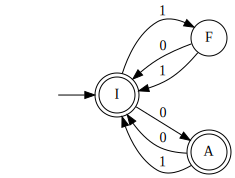

In [56]:
dotObj_dfa_w_bh(comp_dfa(Fig34MC))

In [57]:
ev0 = md2mc('''
DFA
IF : 0 -> A
A  : 0 -> IF
''')

In [58]:
ev0

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0'},
 'q0': 'IF'}

In [59]:
dev0 = dotObj_dfa(ev0)

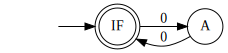

In [60]:
dev0

# You can generate PDF out of a DFA

This is one way to "print" a DFA as PDF. There are 
a few more such commands tucked away within Jupyter.


In [61]:
# Generate a PDF this way
dev0.render('dev0')

'dev0.pdf'

# Poke a DFA, add to its Sigma

You can expand the Sigma of a DFA later on. Then
if you totalize the DFA, you will see black-hole
states emerging. The newly added symbols lead to
the Black hole states, as shown below.


In [62]:
ev0_bh =  addtosigma_dfa(ev0, set({'1'}))

In [63]:
ev0_bh

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [64]:
ev0_bh_totalize = totalize_dfa(ev0_bh)

In [65]:
ev0_bh

{'Delta': {('A', '0'): 'IF', ('IF', '0'): 'A'},
 'F': {'IF'},
 'Q': {'A', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

In [122]:
do_ev0_tot = dotObj_dfa_w_bh(ev0_bh_totalize)
ev0_bh_totalize

{'Delta': {('A', '0'): 'IF',
  ('A', '1'): 'BH',
  ('BH', '0'): 'BH',
  ('BH', '1'): 'BH',
  ('IF', '0'): 'A',
  ('IF', '1'): 'BH'},
 'F': {'IF'},
 'Q': {'A', 'BH', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

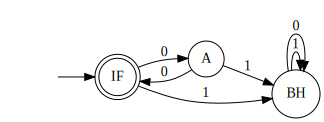

In [67]:
do_ev0_tot

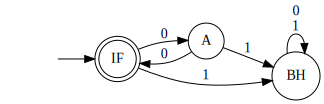

In [68]:
dotObj_dfa_w_bh(ev0_bh_totalize, FuseEdges=True)

<span style="color:blue"> **The main routines to print DFA using dot are listed below.** </span>

* dot_dfa_w_bh : lists all states of a DFA including black-hole states
* dot_dfa      : lists all isNotBH states (see below for a defn), i.e. suppress black-holes
     - Usually there are too many transitions to them and that clutters the view
     

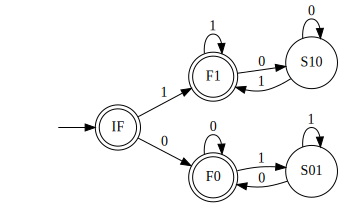

In [69]:
dfaBESame = md2mc('''
DFA !! Begins and ends with same; epsilon allowed
IF  : 0 -> F0
IF  : 1 -> F1
!!
F0  : 0 -> F0
F0  : 1 -> S01
S01 : 1 -> S01
S01 : 0 -> F0
!!
F1  : 1 -> F1
F1  : 0 -> S10
S10 : 0 -> S10
S10 : 1 -> F1
''')
DOdfaBESame = dotObj_dfa(dfaBESame)
DOdfaBESame

## Now administer some tests to print dot-strings generated:

Here are two ways to print automata: 

1. First generate a dot string via dot_dfa or dot_dfa_w_bh
   (calling the result "dot_string") 
   1. Then use the srcObj = Source(dot_string) call
   2. Thereafter we can display the srcObj object directly into the browser
   3. Or, one can also later convert the dot_string to svg or PDF
2. OR, one can directly generate a dot object via the dotObj_dfa or dotObj_dfa_w_bh call
   (calling the result "dot_object")
   1. Then directly display the dot_object
   2. There are conversions available for dot_object to other formats too

# Read DFAs from files

In [70]:
dped1 = md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/pedagogical1.dfa")
#machines/dfafiles/pedagogical1.dfa

In [71]:
dped1

{'Delta': {('A', '0'): 'B',
  ('A', '1'): 'B',
  ('B', '0'): 'IF',
  ('B', '1'): 'F',
  ('F', '0'): 'B',
  ('F', '1'): 'B',
  ('IF', '0'): 'A',
  ('IF', '1'): 'B'},
 'F': {'F', 'IF'},
 'Q': {'A', 'B', 'F', 'IF'},
 'Sigma': {'0', '1'},
 'q0': 'IF'}

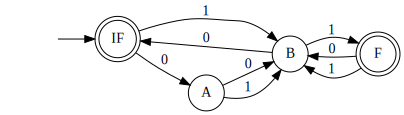

In [72]:
dotObj_dfa(dped1)

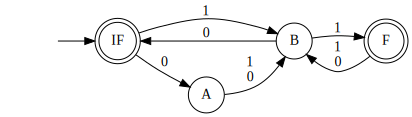

In [73]:
dotObj_dfa(dped1, FuseEdges=True)

In [74]:
ends0101 = md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/endsin0101.dfa")

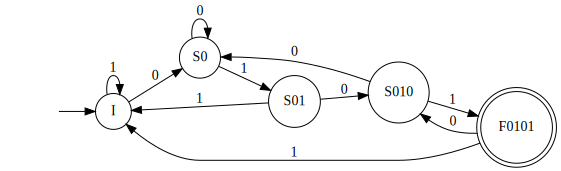

In [75]:
dotObj_dfa(ends0101)

In [76]:
thirdlastis1=md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/thirdlastis1.dfa")
#machines/dfafiles/thirdlastis1.dfa

In [77]:
thirdlastis1

{'Delta': {('F100', '0'): 'S000',
  ('F100', '1'): 'S001',
  ('F101', '0'): 'S010',
  ('F101', '1'): 'S011',
  ('F110', '0'): 'F100',
  ('F110', '1'): 'F101',
  ('F111', '0'): 'F110',
  ('F111', '1'): 'F111',
  ('I', '0'): 'S0',
  ('I', '1'): 'S1',
  ('S0', '0'): 'S00',
  ('S0', '1'): 'S01',
  ('S00', '0'): 'S000',
  ('S00', '1'): 'S001',
  ('S000', '0'): 'S000',
  ('S000', '1'): 'S001',
  ('S001', '0'): 'S010',
  ('S001', '1'): 'S011',
  ('S01', '0'): 'S010',
  ('S01', '1'): 'S011',
  ('S010', '0'): 'F100',
  ('S010', '1'): 'F101',
  ('S011', '0'): 'F110',
  ('S011', '1'): 'F111',
  ('S1', '0'): 'S10',
  ('S1', '1'): 'S11',
  ('S10', '0'): 'F100',
  ('S10', '1'): 'F101',
  ('S11', '0'): 'F110',
  ('S11', '1'): 'F111'},
 'F': {'F100', 'F101', 'F110', 'F111'},
 'Q': {'F100',
  'F101',
  'F110',
  'F111',
  'I',
  'S0',
  'S00',
  'S000',
  'S001',
  'S01',
  'S010',
  'S011',
  'S1',
  'S10',
  'S11'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

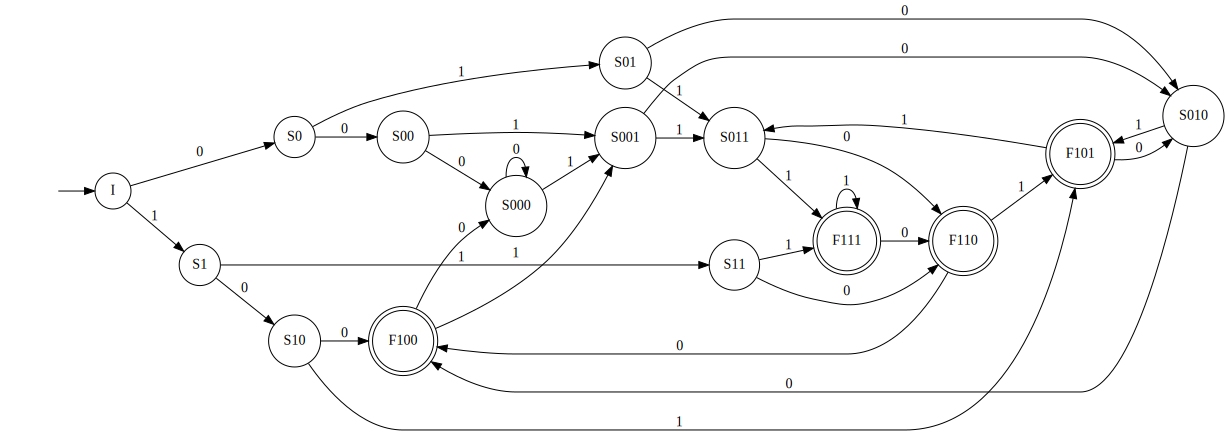

In [78]:
dotObj_dfa(thirdlastis1)

In [79]:
dped1=md2mc(src="File", fname="./Jove/For_CS3100_Fall2020/02_Basic_DFA/pedagogical2.dfa")
#machines/dfafiles/pedagogical2.dfa

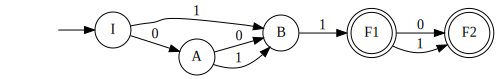

In [80]:
dotObj_dfa(dped1)

In [81]:
secondLastIs1 = md2mc('''
!!------------------------------------------------------------
!! This DFA looks for patterns of the form ....1.
!! i.e., the second-last (counting from the end-point) is a 1
!!
!! DFAs find such patterns "very stressful to handle",
!! as they are kept guessing of the form  'are we there yet?'
!! 'are we seeing the second-last' ?
!! They must keep all the failure options at hand. Even after
!! a 'fleeting glimpse' of the second-last, more inputs can
!! come barreling-in to make that "lucky 1" a non-second-last.
!!
!! We take 7 states in the DFA solution.
!!------------------------------------------------------------

DFA
!!------------------------------------------------------------
!! State : in ->  tostate !! comment
!!------------------------------------------------------------

I   :  0 ->  S0  !! Enter at init state I
I   :  1 ->  S1  !! Record bit seen in state letter
                 !! i.e., S0 means "state after seeing a 0"

S0  :  0 ->  S00 !! continue recording input seen
S0  :  1 ->  S01 !! in state-letter. This is a problem-specific
                 !! way of compressing the input seen so far.

S1  :  0 ->  F10 !! We now have a "second last" available!
S1  :  1 ->  F11 !! Both F10 and F10 are "F" (final)

S00 :  0 ->  S00 !! History of things seen is still 00
S00 :  1 ->  S01 !! Remember 01 in the state

S01 :  0 ->  F10 !! We again have a second-last of 1
S01 :  1 ->  F11 !! We are in F11 because of 11 being last seen

F10 :  0 ->  S00 !! The second-last 1 gets pushed-out
F10 :  1 ->  S01 !! The second-last 1 gets pushed-out here too

F11 :  0 ->  F10 !! Still we have a second-last 1
F11 :  1 ->  F11 !! Stay in F11, as last two seen are 11

!!------------------------------------------------------------
''')

In [82]:
nthnumeric(20,['0','1'])

'0101'

In [83]:
run_dfa(secondLastIs1, '0101')

'S01'

In [84]:
accepts_dfa(secondLastIs1, '0101')

False

In [85]:
tests = [ nthnumeric(i, ['0','1']) for i in range(12) ]
for t in tests:
    if accepts_dfa(secondLastIs1, t):
        print("This DFA accepts ", t)
    else:
        print("This DFA rejects ", t)

This DFA rejects  
This DFA rejects  0
This DFA rejects  1
This DFA rejects  00
This DFA rejects  01
This DFA accepts  10
This DFA accepts  11
This DFA rejects  000
This DFA rejects  001
This DFA accepts  010
This DFA accepts  011
This DFA rejects  100


In [86]:
help(run_dfa)

Help on function run_dfa in module jove.Def_DFA:

run_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: next state of D["q0"] via string s



# Study DeMorgan's Law on DFA

This is an extensive illustration of union, intersection and complementation, DFA minimization, isomorphism test, language equivalence test, and an application of DeMorgan's law

## Define a DFA for "odd 1s" (over {0,1})

In [87]:
dfaOdd1s = md2mc('''
DFA
I : 0 -> I
I : 1 -> F
F : 0 -> F 
F : 1 -> I
''')

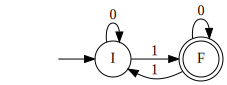

In [88]:
dotObj_dfa(dfaOdd1s)

## Define a DFA for "ends in 01"

In [89]:
ends01 = md2mc('''
DFA 
I     : 1 -> I   !! idle at I
I     : 0 -> S0  !! record 0 seen
 
S0    : 0 -> S0  !! stay at S0, hopeful of a 1
S0    : 1 -> F   !! Found 01

F     : 0 -> S0  !! Broke ending, but S0 is the fall back
F     : 1 -> I   !! Must resume finding another 0
''')

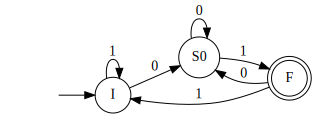

In [90]:
dotObj_dfa(ends01)

## Now produce a DFA for the union

Union of "odd 1s" and "ends in 01"


In [91]:
odd1sORends01 = union_dfa(dfaOdd1s,ends01)

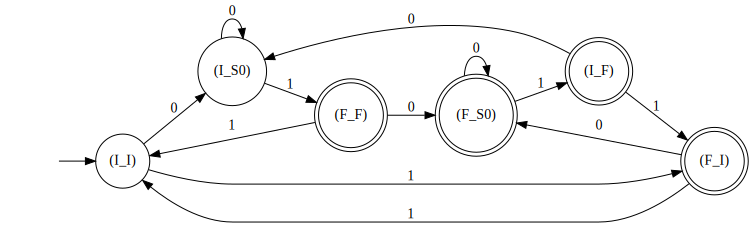

In [92]:
dotObj_dfa(odd1sORends01)

## Apply DFA minimization

In [93]:
Minodd1sORends01 = min_dfa(odd1sORends01)

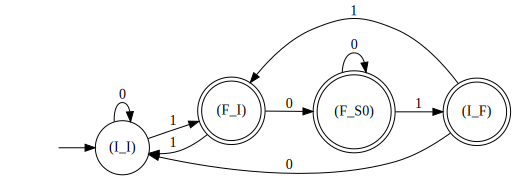

In [94]:
dotObj_dfa(Minodd1sORends01)

## Minimization vs. Isomorphism vs. Language Equivalence

After minimization, we may not have isomorphic DFA, but we 
will have language-equivalent DFA

In [95]:
iso_dfa(odd1sORends01, Minodd1sORends01)

False

In [96]:
langeq_dfa(odd1sORends01, Minodd1sORends01)

True

# We can now find out which states were eliminated upon minimization

In [97]:
odd1sORends01["Q"] - Minodd1sORends01["Q"]

{('F', 'F'), ('I', 'S0')}

## The reason why these states got eliminated is as follows (taking F_F as an example)

* F_F and F_I are indistinguishable by any string! We can study any string from these states and we see that their end states are the same

* Now study the minimization algorithm from the book and know how to write solutions to assignments based on that understanding

## Now define "odd 1s" AND "ends in 01"

Define the and of these machines and minimize it

In [98]:
odd1sANDends01 = intersect_dfa(dfaOdd1s,ends01)

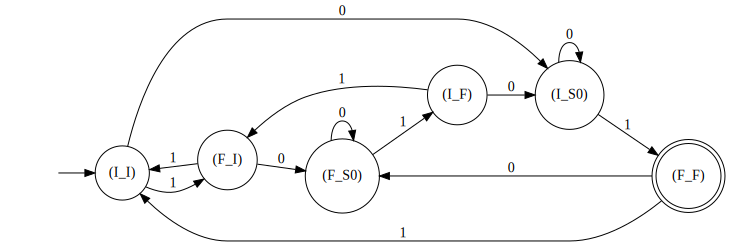

In [99]:
dotObj_dfa(odd1sANDends01)

In [100]:
Minodd1sANDends01 = min_dfa(odd1sANDends01)

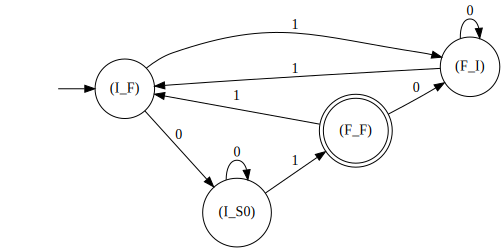

In [101]:
dotObj_dfa(Minodd1sANDends01)

## Now, complement the individual machines

In [102]:
CdfaOdd1s = comp_dfa(dfaOdd1s)

In [103]:
Cends01 = comp_dfa(ends01)
Cends01

{'Delta': {('F', '0'): 'S0',
  ('F', '1'): 'I',
  ('I', '0'): 'S0',
  ('I', '1'): 'I',
  ('S0', '0'): 'S0',
  ('S0', '1'): 'F'},
 'F': {'I', 'S0'},
 'Q': {'F', 'I', 'S0'},
 'Sigma': {'0', '1'},
 'q0': 'I'}

## Complement of the union of the complements

The complement of the union of the complements of M1 and M2 is of course the intersection of M1 and M2! Let us check that!


In [104]:
C_CdfaOdd1sORCends01 = comp_dfa(union_dfa(CdfaOdd1s, Cends01))

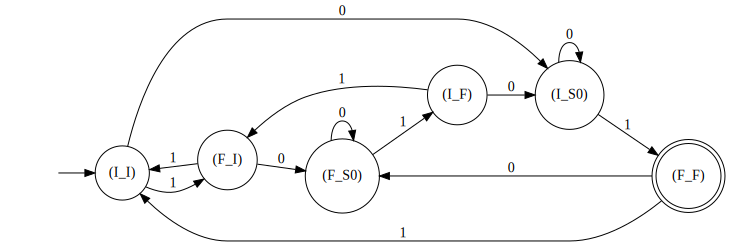

In [105]:
dotObj_dfa(C_CdfaOdd1sORCends01)

In [106]:
MinC_CdfaOdd1sORCends01 = min_dfa(C_CdfaOdd1sORCends01)
MinC_CdfaOdd1sORCends01

{'Delta': {(('F', 'F'), '0'): ('F', 'I'),
  (('F', 'F'), '1'): ('I', 'F'),
  (('F', 'I'), '0'): ('F', 'I'),
  (('F', 'I'), '1'): ('I', 'F'),
  (('I', 'F'), '0'): ('I', 'S0'),
  (('I', 'F'), '1'): ('F', 'I'),
  (('I', 'S0'), '0'): ('I', 'S0'),
  (('I', 'S0'), '1'): ('F', 'F')},
 'F': {('F', 'F')},
 'Q': {('F', 'F'), ('F', 'I'), ('I', 'F'), ('I', 'S0')},
 'Sigma': {'0', '1'},
 'q0': ('I', 'F')}

## Minimized Comp(CdfaOdd1s OR Cends01)

This will now pass the isomorphism check, below


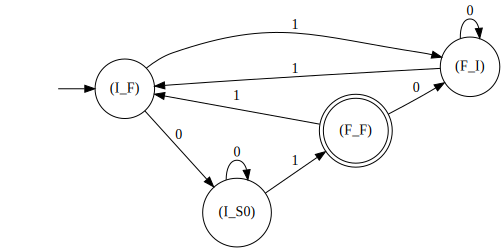

In [107]:
dotObj_dfa(MinC_CdfaOdd1sORCends01)

## DeMorgan's Law works for DFA !!

The same machine, when obtained through two routes, turn out to be isomorphic when minimized


In [108]:
iso_dfa(MinC_CdfaOdd1sORCends01, Minodd1sANDends01)

True

# These are some examples from the book

In [109]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

In [110]:
dblimp = dotObj_dfa(blimp)

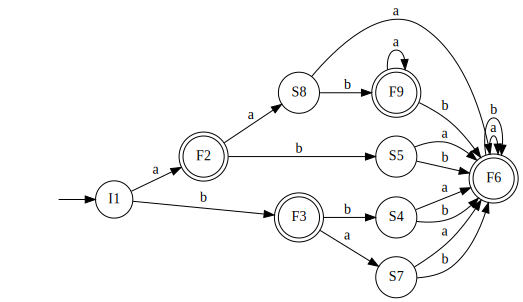

In [111]:
dblimp

In [112]:
dblimp = dotObj_dfa(blimp, FuseEdges=True)

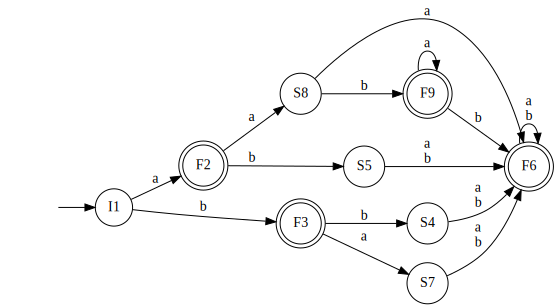

In [113]:
dblimp

In [114]:
mblimp = min_dfa(blimp)

In [115]:
dmblimp = dotObj_dfa(mblimp)

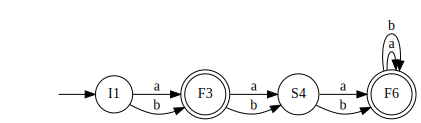

In [116]:
dmblimp

# Minimized "blimp" machine

The minimized blimp machine is indeed quite small.


<br>

<br>

# Caleb S. Fullmer Comments:

I was able to read through the document and gain a general understanding of how to implement DFAs using Jove. I don’t have all the commands memorized, but I feel confident in my ability to apply these tools, even though a review of the exact syntax may be necessary.